# DETECTING PNEUMONIA THROUGH CHEST X-RAY IMAGES USING CONVIT


# What is Pneumonia?
**Pneumonia is an inflammatory condition of the lung affecting primarily the small air sacs known as alveoli.Symptoms typically include some combination of productive or dry cough, chest pain, fever and difficulty breathing. The severity of the condition is variable. Pneumonia is usually caused by infection with viruses or bacteria and less commonly by other microorganisms, certain medications or conditions such as autoimmune diseases.Risk factors include cystic fibrosis, chronic obstructive pulmonary disease (COPD), asthma, diabetes, heart failure, a history of smoking, a poor ability to cough such as following a stroke and a weak immune system. Diagnosis is often based on symptoms and physical examination. Chest X-ray, blood tests, and culture of the sputum may help confirm the diagnosis.The disease may be classified by where it was acquired, such as community- or hospital-acquired or healthcare-associated pneumonia.**
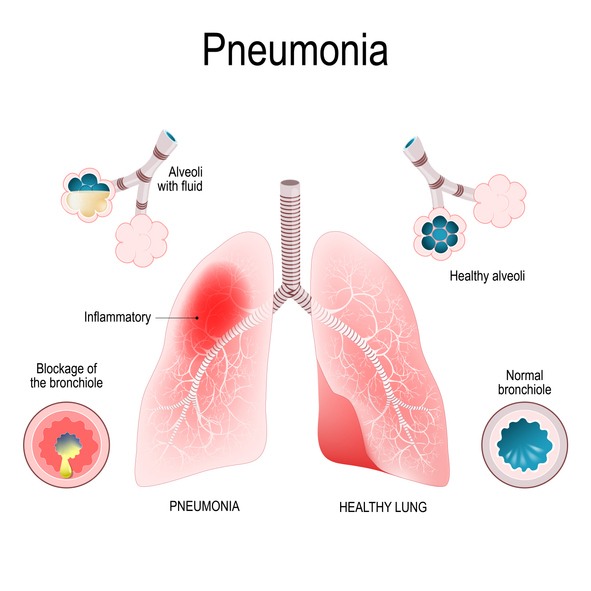

# Importing the necessary libraries

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import cv2
import os

In [2]:
#!pip install tensorflow

In [3]:
#!pip install tensorflow-addons

# Description of the Pneumonia Dataset
**The dataset is organized into 3 folders (train, test, val) and contains subfolders for each image category (Pneumonia/Normal). There are 5,863 X-Ray images (JPEG) and 2 categories (Pneumonia/Normal).
Chest X-ray images (anterior-posterior) were selected from retrospective cohorts of pediatric patients of one to five years old from Guangzhou Women and Children’s Medical Center, Guangzhou. All chest X-ray imaging was performed as part of patients’ routine clinical care.
For the analysis of chest x-ray images, all chest radiographs were initially screened for quality control by removing all low quality or unreadable scans. The diagnoses for the images were then graded by two expert physicians before being cleared for training the AI system. In order to account for any grading errors, the evaluation set was also checked by a third expert.**

In [4]:
import numpy as np
import pandas as pd

In [5]:
labels = ['PNEUMONIA', 'NORMAL']
img_size = 150
def get_training_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

# Loading the Dataset

In [6]:
train = get_training_data('C:/Users/parul/OneDrive/Desktop/Parul/Chest X_Ray Images/dummie/train')
test = get_training_data('C:/Users/parul/OneDrive/Desktop/Parul/Chest X_Ray Images/dummie/test')
val = get_training_data('C:/Users/parul/OneDrive/Desktop/Parul/Chest X_Ray Images/chest_xray/val')

C:\Users\parul\AppData\Local\Temp\ipykernel_9160\771166761.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


In [7]:
train

array([[array([[39, 40, 45, ..., 32, 12, 10],
               [41, 45, 50, ..., 20, 10,  8],
               [42, 46, 48, ..., 14,  8,  6],
               ...,
               [ 0,  0,  0, ...,  0,  0,  0],
               [ 0,  0,  0, ...,  0,  0,  0],
               [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8), 0],
       [array([[ 26,  42,  42, ...,   0,   0,   0],
               [ 24,  35,  41, ...,   2,   0,   0],
               [ 26,  39,  43, ...,   1, 238,   0],
               ...,
               [  0,   0,   0, ...,   1,   3,   6],
               [  4,   0,   0, ...,   0, 185,   5],
               [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8), 0],
       [array([[107, 102, 100, ...,  54, 253,   2],
               [103,  98, 107, ...,  15,  13,   7],
               [109, 102, 105, ...,  19,   3,   7],
               ...,
               [  4,   5,   6, ...,   0,   0,   0],
               [  1,   0,   0, ...,   0,   0,   3],
               [  3,   3, 240, ...,   0,   0,   0]], d

# Data Visualization & Preprocessing

C:\Users\parul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

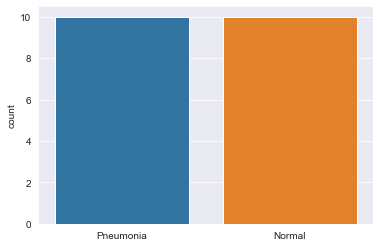

In [8]:
l = []
for i in train:
    if(i[1] == 0):
        l.append("Pneumonia")
    else:
        l.append("Normal")
sns.set_style('darkgrid')
sns.countplot(l)        

**The data seems imbalanced . To increase the no. of training examples, we will use data augmentation**

**Previewing the images of both the classes**

Text(0.5, 1.0, 'NORMAL')

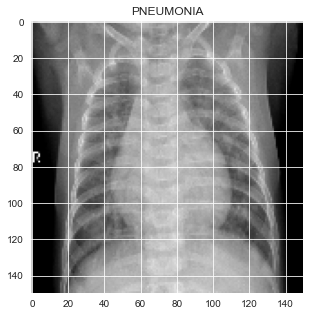

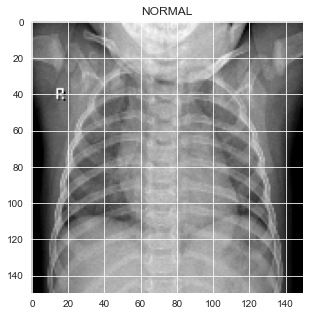

In [9]:
plt.figure(figsize = (5,5))
plt.imshow(train[0][0], cmap='gray')
plt.title(labels[train[0][1]])

plt.figure(figsize = (5,5))
plt.imshow(train[-1][0], cmap='gray')
plt.title(labels[train[-1][1]])

In [10]:
x_train = []
y_train = []

x_test = []
y_test = []

x_val = []
y_val = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)
    
for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

In [11]:
y_val

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


**We perform a grayscale normalization to reduce the effect of illumination's differences.**

In [12]:
# Normalize the data that is converting it to range 0 to 1
x_train = np.array(x_train) / 255
x_test = np.array(x_test) / 255
x_val = np.array(x_val) / 255

In [13]:
# resize data for deep learning 
x_train = x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_test = x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

x_val = x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

# Data Augmentation
**In order to avoid overfitting problem, we need to expand artificially our dataset. We can make your existing dataset even larger. The idea is to alter the training data with small transformations to reproduce the variations.
Approaches that alter the training data in ways that change the array representation while keeping the label the same are known as data augmentation techniques. Some popular augmentations people use are grayscales, horizontal flips, vertical flips, random crops, color jitters, translations, rotations, and much more.
By applying just a couple of these transformations to our training data, we can easily double or triple the number of training examples and create a very robust model.**

In [14]:
# With data augmentation to prevent overfitting and handling the imbalance in dataset

datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False,  
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range = 30,  
        zoom_range = 0.2, 
        width_shift_range=0.1,  
        height_shift_range=0.1,  
        horizontal_flip = True,  
        vertical_flip=False)  


datagen.fit(x_train)

In [15]:
y_train.shape

(20,)

In [16]:
x_train.shape

(20, 150, 150, 1)

For the data augmentation, we choosed to :
1. Randomly rotate some training images by 30 degrees 
2. Randomly Zoom by 20% some training images
3. Randomly shift images horizontally by 10% of the width 
4. Randomly shift images vertically by 10% of the height 
5. Randomly flip images horizontally.
Once our model is ready, we fit the training dataset.

### TRAINING THE MODEL WITH CNN

In [17]:
#from keras.layers import Conv2D, Dense,Dropout,MaxPooling2D,Activation,Flatten
from keras.layers import Activation,MaxPooling2D

In [18]:
model=Sequential()
model.add(Conv2D(32,(3,3),padding='same',strides=1,input_shape=(150,150,1)))  
model.add(Activation('relu'))
model.add(BatchNormalization())
#model.add(Conv2D(64,(3,3),padding='same',strides=1))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# model.add(Conv2D(64,(3,3),padding='same',strides=1))
# model.add(Activation('relu'))
# model.add(Conv2D(128,(3,3),padding='same',strides=1))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss="binary_crossentropy",
             optimizer="adam",
             metrics=['accuracy'])

#model.fit(X,y,batch_size=32,epochs=10,validation_split=0.1)

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      320       
                                                                 
 activation (Activation)     (None, 150, 150, 32)      0         
                                                                 
 batch_normalization (BatchN  (None, 150, 150, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 75, 75, 32)        0         
                                                                 
 flatten (Flatten)           (None, 180000)            0

In [19]:
# model = Sequential()
# model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (150,150,1)))
# model.add(BatchNormalization())
# model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
# model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
# model.add(Dropout(0.1))
# model.add(BatchNormalization())
# model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
# model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
# model.add(BatchNormalization())
# model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
# model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
# model.add(Dropout(0.2))
# model.add(BatchNormalization())
# model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
# model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
# model.add(Dropout(0.2))
# model.add(BatchNormalization())
# model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
# model.add(Flatten())
# model.add(Dense(units = 128 , activation = 'relu'))
# model.add(Dropout(0.2))

# model.add(Dense(units = 1 , activation = 'sigmoid'))
# model.compile(optimizer = "rmsprop" , loss = 'binary_crossentropy' , metrics = ['accuracy'])
# model.summary()

In [20]:
from keras.optimizers import Nadam,RMSprop,SGD
from keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau

In [21]:
#SGD Optimizer
checkpoint=ModelCheckpoint(r'C:/Users/parul/.keras/pneumonia_classifier.h5',
                          monitor="val_accuracy",
                          save_best_only=True,
                          verbose=1)

earlystop=EarlyStopping(monitor="val_accuracy",
                       min_delta=0,
                       patience=3,
                       verbose=1,
                       restore_best_weights=True)

reduce_lr=ReduceLROnPlateau(monitor="val_accuracy",
                           factor=0.2,
                           patience=3,
                           verbose=1,
                           min_lr=0.000001)

callbacks=[earlystop,checkpoint,reduce_lr]

model.compile(loss='binary_crossentropy',
             optimizer=SGD(learning_rate=0.01),
             metrics=['accuracy'])

train_samples=180
validation_samples=20
batch_size=32

#datagen.flow(x_train,y_train, batch_size = 32) ,epochs = 12 , validation_data = datagen.flow(x_val, y_val) ,callbacks = [learning_rate_reduction])
history=model.fit(datagen.flow(x_train,y_train,batch_size=batch_size),epochs=20,callbacks=callbacks,validation_data=datagen.flow(x_val, y_val))

Epoch 1/20
1/1 [==============================] - ETA: 0s - loss: 0.9257 - accuracy: 0.4500
Epoch 1: val_accuracy improved from -inf to 0.50430, saving model to C:/Users/parul/.keras\pneumonia_classifier.h5
1/1 [==============================] - 5s 5s/step - loss: 0.9257 - accuracy: 0.4500 - val_loss: 1.2424 - val_accuracy: 0.5043 - lr: 0.0100
Epoch 2/20
1/1 [==============================] - ETA: 0s - loss: 3.4952 - accuracy: 0.6000
Epoch 2: val_accuracy did not improve from 0.50430
1/1 [==============================] - 3s 3s/step - loss: 3.4952 - accuracy: 0.6000 - val_loss: 0.9343 - val_accuracy: 0.5043 - lr: 0.0100
Epoch 3/20
1/1 [==============================] - ETA: 0s - loss: 4.7893 - accuracy: 0.6000
Epoch 3: val_accuracy did not improve from 0.50430
1/1 [==============================] - 3s 3s/step - loss: 4.7893 - accuracy: 0.6000 - val_loss: 0.7812 - val_accuracy: 0.5043 - lr: 0.0100
Epoch 4/20
1/1 [==============================] - ETA: 0s - loss: 2.1342 - accuracy: 0.450

In [22]:
print("Loss of the model is - " , model.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

1/1 [==============================] - 0s 133ms/step - loss: 1.0034 - accuracy: 0.5000
Loss of the model is -  1.0034188032150269
1/1 [==============================] - 0s 149ms/step - loss: 1.0034 - accuracy: 0.5000
Accuracy of the model is -  50.0 %


In [23]:
#RMSprop optimizer
checkpoint=ModelCheckpoint(r'C:/Users/parul/.keras/pneumonia_classifier.h5',
                          monitor="val_accuracy",
                          save_best_only=True,
                          verbose=1)

earlystop=EarlyStopping(monitor="val_accuracy",
                       min_delta=0,
                       patience=3,
                       verbose=1,
                       restore_best_weights=True)

reduce_lr=ReduceLROnPlateau(monitor="val_accuracy",
                           factor=0.2,
                           patience=3,
                           verbose=1,
                           min_delta=0.0001)

callbacks=[earlystop,checkpoint,reduce_lr]

model.compile(loss='binary_crossentropy',
             optimizer=RMSprop(learning_rate=0.001),
             metrics=['accuracy'])

train_samples=180
validation_samples=20
batch_size=32


history1=model.fit(datagen.flow(x_train,y_train,batch_size=batch_size),epochs=20,callbacks=callbacks,validation_data=datagen.flow(x_val, y_val))

Epoch 1/20
1/1 [==============================] - ETA: 0s - loss: 2.2586 - accuracy: 0.6000
Epoch 1: val_accuracy improved from -inf to 0.50430, saving model to C:/Users/parul/.keras\pneumonia_classifier.h5
1/1 [==============================] - 6s 6s/step - loss: 2.2586 - accuracy: 0.6000 - val_loss: 11.2455 - val_accuracy: 0.5043 - lr: 0.0010
Epoch 2/20
1/1 [==============================] - ETA: 0s - loss: 41.3949 - accuracy: 0.4500
Epoch 2: val_accuracy improved from 0.50430 to 0.56160, saving model to C:/Users/parul/.keras\pneumonia_classifier.h5
1/1 [==============================] - 3s 3s/step - loss: 41.3949 - accuracy: 0.4500 - val_loss: 1.4095 - val_accuracy: 0.5616 - lr: 0.0010
Epoch 3/20
1/1 [==============================] - ETA: 0s - loss: 28.7403 - accuracy: 0.5500
Epoch 3: val_accuracy did not improve from 0.56160
1/1 [==============================] - 3s 3s/step - loss: 28.7403 - accuracy: 0.5500 - val_loss: 9.0011 - val_accuracy: 0.5043 - lr: 0.0010
Epoch 4/20
1/1 [==

In [24]:
print("Loss of the model is - " , model.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

1/1 [==============================] - 0s 139ms/step - loss: 0.5791 - accuracy: 0.6000
Loss of the model is -  0.5790613889694214
1/1 [==============================] - 0s 99ms/step - loss: 0.5791 - accuracy: 0.6000
Accuracy of the model is -  60.00000238418579 %


In [25]:
#Nadam Optimizer
checkpoint=ModelCheckpoint(r'C:/Users/parul/.keras/pneumonia_classifier.h5',
                          monitor="val_accuracy",
                          save_best_only=True,
                          verbose=1)

earlystop=EarlyStopping(monitor="val_accuracy",
                       min_delta=0,
                       patience=3,
                       verbose=1,
                       restore_best_weights=True)

reduce_lr=ReduceLROnPlateau(monitor="val_accuracy",
                           factor=0.2,
                           patience=3,
                           verbose=1,
                           min_delta=0.0001)

callbacks=[earlystop,checkpoint,reduce_lr]

model.compile(loss='binary_crossentropy',
             optimizer=Nadam(learning_rate=0.01),
             metrics=['accuracy'])

train_samples=180
validation_samples=20
batch_size=32


history2=model.fit(datagen.flow(x_train,y_train,batch_size=batch_size),epochs=20,callbacks=callbacks,validation_data=datagen.flow(x_val, y_val))

Epoch 1/20
1/1 [==============================] - ETA: 0s - loss: 28.3782 - accuracy: 0.5500
Epoch 1: val_accuracy improved from -inf to 0.50430, saving model to C:/Users/parul/.keras\pneumonia_classifier.h5
1/1 [==============================] - 7s 7s/step - loss: 28.3782 - accuracy: 0.5500 - val_loss: 30.1722 - val_accuracy: 0.5043 - lr: 0.0100
Epoch 2/20
1/1 [==============================] - ETA: 0s - loss: 81.1160 - accuracy: 0.5000
Epoch 2: val_accuracy did not improve from 0.50430
1/1 [==============================] - 3s 3s/step - loss: 81.1160 - accuracy: 0.5000 - val_loss: 6.7257 - val_accuracy: 0.4957 - lr: 0.0100
Epoch 3/20
1/1 [==============================] - ETA: 0s - loss: 22.2110 - accuracy: 0.4000
Epoch 3: val_accuracy did not improve from 0.50430
1/1 [==============================] - 3s 3s/step - loss: 22.2110 - accuracy: 0.4000 - val_loss: 1.2258 - val_accuracy: 0.5043 - lr: 0.0100
Epoch 4/20
1/1 [==============================] - ETA: 0s - loss: 12.6508 - accurac

In [26]:
print("Loss of the model is - " , model.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

1/1 [==============================] - 0s 119ms/step - loss: 30.7302 - accuracy: 0.5000
Loss of the model is -  30.730213165283203
1/1 [==============================] - 0s 118ms/step - loss: 30.7302 - accuracy: 0.5000
Accuracy of the model is -  50.0 %


In [27]:
#learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)

In [28]:
#history = model.fit(datagen.flow(x_train,y_train, batch_size = 32) ,epochs = 12 , validation_data = datagen.flow(x_val, y_val) ,callbacks = [learning_rate_reduction])

In [29]:
# # keras imports for the dataset and building our neural network
# from keras.datasets import mnist
# from keras.models import Sequential
# from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
# from keras.utils import np_utils

# # to calculate accuracy
# from sklearn.metrics import accuracy_score

# # loading the dataset
# (X_train, y_train), (X_test, y_test) = mnist.load_data()

# # building the input vector from the 28x28 pixels
# X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
# X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
# X_train = X_train.astype('float32')
# X_test = X_test.astype('float32')

# # normalizing the data to help with the training
# X_train /= 255
# X_test /= 255

# # one-hot encoding using keras' numpy-related utilities
# n_classes = 10
# print("Shape before one-hot encoding: ", y_train.shape)
# Y_train = np_utils.to_categorical(y_train, n_classes)
# Y_test = np_utils.to_categorical(y_test, n_classes)
# print("Shape after one-hot encoding: ", Y_train.shape)

# # building a linear stack of layers with the sequential model
# model = Sequential()
# # convolutional layer
# model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1)))
# model.add(MaxPool2D(pool_size=(1,1)))
# # flatten output of conv
# model.add(Flatten())
# # hidden layer
# model.add(Dense(100, activation='relu'))
# # output layer
# model.add(Dense(10, activation='softmax'))

# # compiling the sequential model
# model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# # training the model for 10 epochs
# model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))

In [30]:
x_validation = np.asarray(x_val)

In [31]:
prediction =model.predict(x_validation)

11/11 [==============================] - 2s 130ms/step


In [32]:
model.evaluate(x_test,y_test)

1/1 [==============================] - 0s 119ms/step - loss: 30.7302 - accuracy: 0.5000


[30.730213165283203, 0.5]

In [33]:
print(prediction[0])
print('Index:',np.argmax(prediction[0]))

[5.5399966e-23]
Index: 0


In [34]:
y_classes = [element.item() for element in prediction]
print("Predicted_values:",y_classes[:10])
print("Actual_values:",y_test[:10])

Predicted_values: [5.539996587968017e-23, 8.917451196361954e-32, 1.7161503825331081e-25, 4.433457451909978e-26, 4.4523885728913267e-26, 2.7505255843938773e-21, 1.1447255505489762e-25, 8.678296566563261e-27, 1.136912749951237e-27, 1.2173320617464852e-25]
Actual_values: [0 0 0 0 0 0 0 0 0 0]


In [35]:
y_classes

[5.539996587968017e-23,
 8.917451196361954e-32,
 1.7161503825331081e-25,
 4.433457451909978e-26,
 4.4523885728913267e-26,
 2.7505255843938773e-21,
 1.1447255505489762e-25,
 8.678296566563261e-27,
 1.136912749951237e-27,
 1.2173320617464852e-25,
 3.704409163814181e-24,
 2.8160229274960906e-27,
 2.0363272580650503e-29,
 2.910723827867714e-29,
 1.0264116742939598e-24,
 2.0713435547007453e-33,
 1.9572925098253667e-30,
 1.2655758697184526e-37,
 4.5519473181025685e-25,
 6.62674125728037e-30,
 5.874104385974298e-30,
 1.0899731957153541e-26,
 4.004199184764417e-24,
 3.3362925333823495e-31,
 1.6453761824973512e-18,
 4.7237653524535056e-27,
 1.75199845879324e-29,
 2.703170928474342e-25,
 5.775763989447724e-21,
 3.752914109407001e-30,
 2.0697207768148483e-29,
 2.901229742910116e-25,
 1.2140425645070651e-20,
 4.4638510916227373e-26,
 3.3635225073708426e-32,
 3.414038388591317e-26,
 4.420959861389256e-26,
 5.65475849473776e-24,
 3.0680575589230145e-29,
 1.7434437563373342e-30,
 1.7165679720210554e-